In [3]:
!pip install seaborn

In [2]:
# 데이터 다운로드(MAC)
!wget "https://raw.githubusercontent.com/JM-Education/python-utilization/main/(w04)dataAnalysis/titanic.csv"

--2023-11-26 01:46:13--  https://raw.githubusercontent.com/JM-Education/python-utilization/main/(w04)dataAnalysis/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62005 (61K) [text/plain]
Saving to: 'titanic.csv'

titanic.csv         100%[===================>]  60.55K  --.-KB/s    in 0.01s   

2023-11-26 01:46:13 (5.25 MB/s) - 'titanic.csv' saved [62005/62005]



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
titanic_data = pd.read_csv('titanic.csv')

# 데이터의 일부 확인
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId: 승객의 고유 식별자.
- Survived: 생존 여부를 나타내는 열입니다. 0은 사망, 1은 생존을 의미합니다.
- Pclass: 승객의 객실 등급. 1은 1등급, 2는 2등급, 3은 3등급을 나타냅니다.
- Name: 승객의 이름.
- Gender: 승객의 성별. 'male' 또는 'female'.
- Age: 승객의 나이.
- SibSp: 함께 탑승한 형제자매 또는 배우자의 수.
- Parch: 함께 탑승한 부모 또는 자녀의 수.
- Ticket: 티켓 번호.
- Fare: 지불한 요금.
- Cabin: 객실 번호.
- Embarked: 탑승 항구. 'C'는 Cherbourg, 'Q'는 Queenstown, 'S'는 Southampton를 나타냅니다.

In [22]:
# 데이터 수 확인
len(titanic_data)

891

In [4]:
# 데이터 정보 확인
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 기술통계량 확인
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# 총 가족 수 새로 만들기
titanic_data['Family_Size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

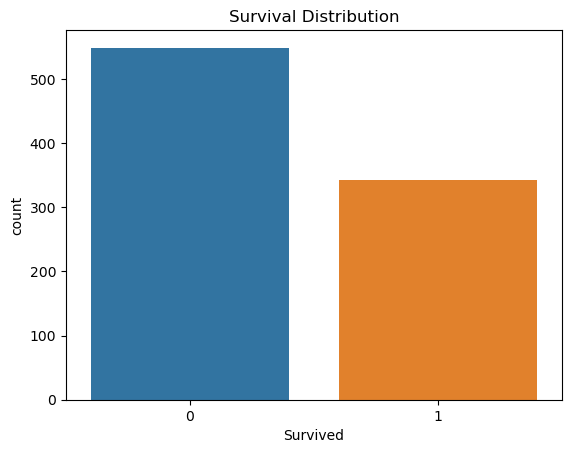

In [6]:
# 생존 여부에 따른 승객 수 분포 확인
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.show()

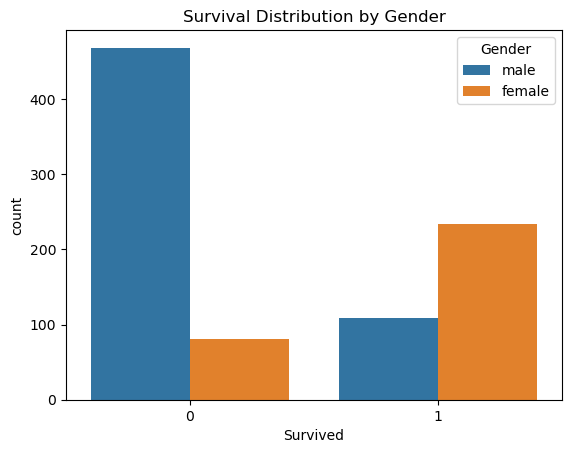

In [9]:
# 성별에 따른 생존 여부 분포 확인
sns.countplot(x='Survived', hue='Gender', data=titanic_data)
plt.title('Survival Distribution by Gender')
plt.show()

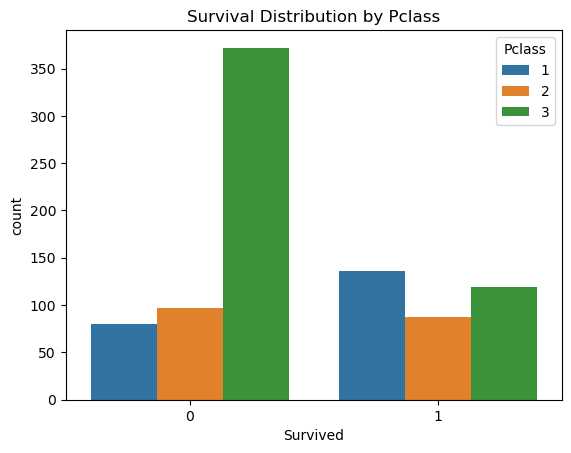

In [15]:
# 객실 등급에 따른 생존 여부 분포 확인
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Distribution by Pclass')
plt.show()

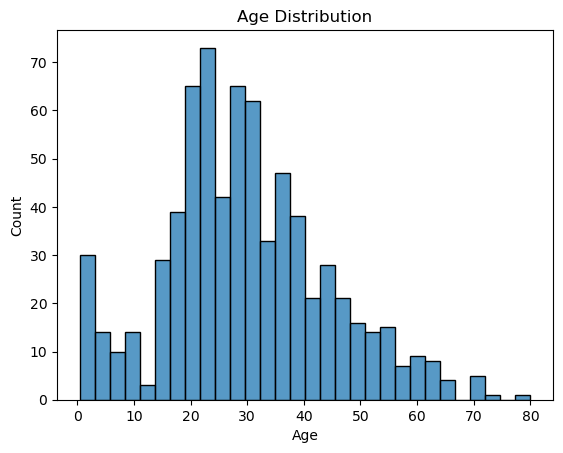

In [13]:
# 나이 분포 확인
sns.histplot(titanic_data['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.show()

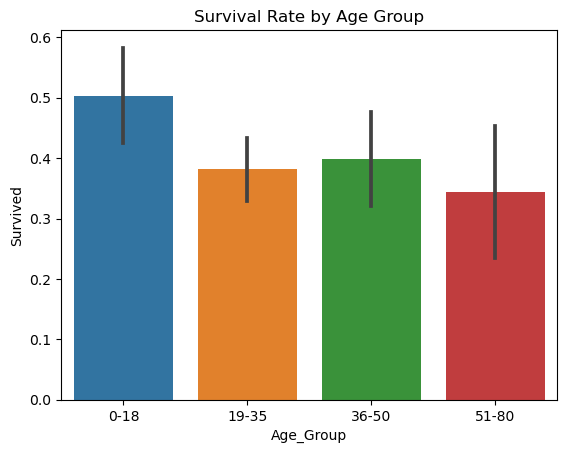

In [18]:
# 나이 그룹에 따른 생존율
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 50, 80], labels=['0-18', '19-35', '36-50', '51-80'])
sns.barplot(x='Age_Group', y='Survived', data=titanic_data)
plt.title('Survival Rate by Age Group')
plt.show()

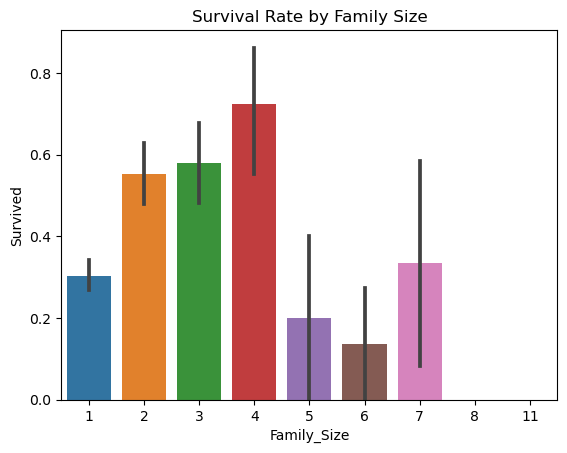

In [19]:
# 가족 규모에 따른 생존율 확인
sns.barplot(x='Family_Size', y='Survived', data=titanic_data)
plt.title('Survival Rate by Family Size')
plt.show()